## 로지스틱 회귀

Classification : 주어진 데이터를 범주에 따라 분류

예측 결과가 숫자가 아닐 때 사용될 수 있음.

로지스틱 회귀는 분류 모델

- 선형 회귀 방식을 분류에 적용한 알고리즘
- 데이터가 어떤 범주에 속할 확률은 0~1 사이의 값으로 예측
- 더 높은 범주에 속하는 쪽으로 분류 

(예) 스팸 메일, 은행 대출, 악성 여부, 고객의 제품 구매 의사

### 공부 시간에 따른 시험 점수 데이터

자격증 시험이라고 해보자. 합격 여부는 불합격/합격으로 분류된다.

불합격 = 0, 합격 = 1이라고 해보면, 공부 시간에 따라서 상대적으로 공부를 더 한 사람 합격, 덜 한 사람은 불합격이라 말할 수 있음.

그렇다면 "6시간 공부했을 때 자격증을 딸 수 있을까?"라는 질문에 어떻게 예측을 할 수 있을까?

**회귀 모델의 경우**

모델을 산정을 할 수는 있으나, 0과 1 사이의 값이 도출되지는 않는다.

0에 못 미치거나 1을 넘는 값들을 0과 1로 취급하면 모델 선정이 가능하기는 하다.

### 시그모이드 함수

단순선형회귀 함수 :

$$ y = mx + b$$

에서 시그모이드 함수를 적용시킬 수 있다.

$$ P = \frac{1}{1+e^{-y}} $$

이는 우리가 원하는 0부터 1 사이의 확률을 얻을 수 있게 한다.

이를 다시 한 번 풀어보면 :

$$log \frac{P}{1-P} = mx + b$$로 만들 수 있다.

다시, 시험 데이터로 돌아와서 이 데이터에 로지스틱 회귀를 적용하면

$$ 0 \leqq P(pass) \leqq 1 $$

로 결과값이 나타나는 것을 볼 수 있다.

## 로지스틱 회귀 실습

### 공부 시간에 따른 자격증 시험 합격 가능성

In [10]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2959 sha256=afe4c583580cd05f1a18b8a337c4335f4ad6b8ae0e9af10c30015f7879b2d58c
  Stored in directory: /Users/choeunsol/Library/Caches/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys, os
os.chdir("/Users/choeunsol/Python/나도코딩 - 파이썬 스터디/PythonMLWorkspace(LightWeight)/ScikitLearn")
sys.path.append(os.pardir)

## 데이터 불러오기
dataset = pd.read_csv("LogisticRegressionData.csv")
X = dataset.iloc[:, :-1].values
## 주의할 점 : 1차원 array가 아닌 다차원 array가 되어야 한다.
y = dataset.iloc[:, -1].values

### 데이터 분리

In [2]:
from sklearn.model_selection import train_test_split
## 데이터를 분리하는 모듈
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# random_state는 시드 고정

### 학습 (로지스틱 회귀 모델)

In [3]:
from sklearn.linear_model import LogisticRegression
## 로지스틱 회귀 클래스를 가져온다.

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

### 6시간 공부할 때 예측?

In [4]:
classifier.predict([[6]]) # 2차원 배열을 넣어주어야 한다.
# 결과 1 : 합격할 것으로 예측

array([1])

In [5]:
classifier.predict_proba([[6]])
# 첫 번째가 불합격할 확률, 두 번째가 합격할 확률
# 14%의 불합격 확률, 85%의 합격 확률

array([[0.14150735, 0.85849265]])

### 4시간 공부할 때 예측

In [6]:
classifier.predict([[4]])
# 결과 2 : 불합격할 것으로 예측

array([0])

In [7]:
classifier.predict_proba([[4]])

array([[0.6249966, 0.3750034]])

### 분류 결과 예측 (테스트 세트)

In [10]:
y_pred = classifier.predict(X_test)
y_pred # 예측값

array([1, 0, 1, 1])

In [11]:
y_test # 실제 값

array([1, 0, 1, 0])

예측 4개 중에 3개는 맞고, 하나는 틀렸다.

그렇다면 이 데이터에 해당하는 공부 시간 정보를 찍어보자.

In [12]:
X_test

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [13]:
classifier.score(X_test, y_test) # 모델 평가

0.75

전체 테스트 세트 4개 중에서 분류 예측을 올바로 맞힌 개수 3개. 75%의 적중률.

### 데이터 시각화 (훈련 세트)

먼저 준비해야 할 것 : 데이터를 촘촘하게 나눠서 부드러운 직선으로 표현

In [14]:
X_range = np.arange(min(X), max(X), 0.1)
p = 1 / (1 + np.exp(-(classifier.coef_ * X_range + classifier.intercept_)))

p.shape

(1, 95)

In [15]:
X_range.shape

(95,)

    p.shape와 X_range.shape를 맞추어야 한다.

In [16]:
p = p.reshape(X_range.shape)
# p = p.reshape(-1)

## -1은 이 자리에 맞게 행렬을 재조직.
p.shape

(95,)

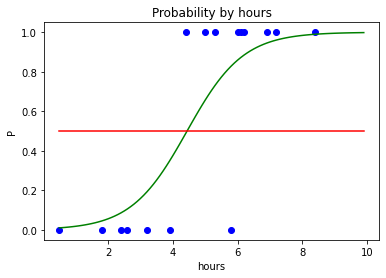

In [17]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_range, p, color = 'green')
plt.plot(X_range, np.full(len(X_range),0.5), color = 'red')
# np.full(length, object) : object를 length만큼 채워라
# X_range 개수만큼 0.5로 가득찬 배열 만들기
plt.title("Probability by hours")
plt.xlabel("hours")
plt.ylabel("P")
plt.show()

### 데이터 시각화 (테스트 세트)

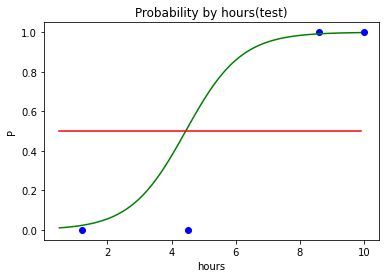

In [18]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_range, p, color = 'green')
plt.plot(X_range, np.full(len(X_range),0.5), color = 'red')
# np.full(length, object) : object를 length만큼 채워라
# X_range 개수만큼 0.5로 가득찬 배열 만들기
plt.title("Probability by hours(test)")
plt.xlabel("hours")
plt.ylabel("P")
plt.show()

4.5시간에 해당하는 저 데이터는 예측 실패.

예측 확률을 한번 보자.

In [20]:
classifier.predict_proba([[4.5]]) # 4.5시간 공부했을 때 확률(모델에서는 합격 예측, 실제로는 불합격)

array([[0.48310686, 0.51689314]])

## 혼동 행렬(Confusion Matrix)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# 실제 데이터와 예측 데이터를 넣음
cm

array([[1, 1],
       [0, 2]])

$(1,1) \rightarrow$ 예측 불합격, 실제 불합격 (True Negative)

$(1,2) \rightarrow$ 예측 합격, 실제 불합격 (False Positive)

$(2,1) \rightarrow$ 예측 불합격, 실제 합격 (False Negative)

$(2,2) \rightarrow$ 예측 합격, 실제 합격 (True Positive)

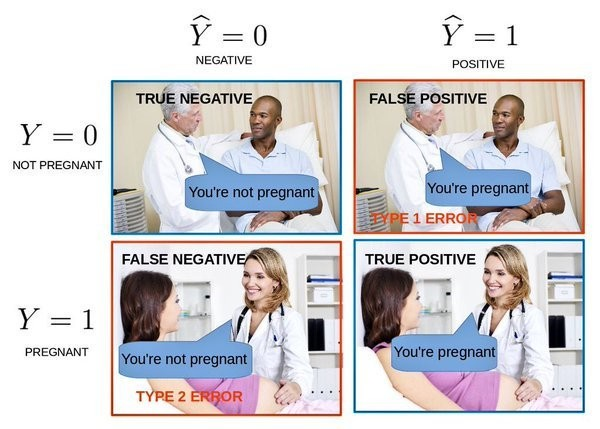

In [23]:
from IPython.display import Image
Image("/Users/choeunsol/confusion_matrix.jpeg")

이해하려면 위의 사진을 참고하자.

## 비지도 학습

### Clustering

유사한 특징을 가지는 데이터들을 그룹화

(예) 고객 세분화, 소셜 네트워크 분석, 기사 그룹 분류, ...

지도 학습의 Classification과는 성격이 다르다

분류는 정답이 있는 데이터를 학습하고, 인지한 뒤에 새로운 데이터가 들어오면 분류. 군집화는 정답을 모르는 상태에서 **비슷한 성격을 가진 데이터끼리 묶어주는 것**.

### K-means

데이터를 K개의 클러스터로 군집화하는 알고리즘으로, 각 데이터로부터 이들이 속한 **클러스터의 중심점(Centroid)까지의 평균 길이**를 계산

몇 개의 그룹에 해당하는 것이 K-means의 K.

**K-means의 동작 순서**

1. K값 설정 : 사람이 직접 설명한다.

2. 지정된 K 개 만큼의 랜덤 좌표 설정 : 이 좌표가 각 클러스터의 최초 중심점이 되는 것. 데이터에서 고르지 않아도 상관 없음.

3. 모든 데이터로부터 가장 가까운 중심점을 선택 : 가까운 중심점으로 데이터를 분류
- 중심점을 긋고, 중간 지점을 수직으로 관통하는 선을 그린다. 이 관통하는 선을 기준으로 데이터를 나누는 방법도 있다. 

4. 데이터들의 평균 중심으로 중심점을 이동

5. 중심점이 더 이상 이동되지 않을 때까지 반복
- 3번으로 돌아가 모든 데이터로부터 가까운 중심적을 재선택

### K값의 지정

예를 들어 크기별로 사과를 나눌 때, 기준을 어떻게 할까?

대/중/소, 큰 것/작은 것, 특대/대/중/소.. 등등 많은 방법이 있을 것이다.

이 때 활용하는 것이 Elbow Method이다.

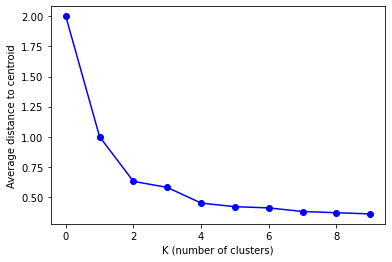

In [28]:
x = np.array([np.arange(10)]).reshape(-1)
y = np.array([2.0, 1.0, 0.63, 0.58, 0.45, 0.42, 0.41, 0.38, 0.37, 0.36])
plt.plot(x, y, color = 'blue')
plt.scatter(x, y, color = 'blue')
plt.xlabel('K (number of clusters)')
plt.ylabel('Average distance to centroid')
plt.show()

1. K 변화에 따른 중심점까지의 평균 거리 비교 (위 그래프)

2. 경사가 완만해지는 지점의 K 선정 (위 그래프에서는 K = 3) -> elbow point

## 유사도

### 유클리드 거리

두 점을 직선으로 쭉 연결했을 떄 그 직선거리

$$d = \sqrt{((x_2 - x_1)^2 + (y_2 - y_1)^2}$$

### 맨해튼 거리

두 지점을 격자에 그린다고 생각해보았을 때, 모눈 안에 건물이 있다고 생각하자.

유클리드 거리처럼 가로질러 갈 수가 없으므로 목적지의 $y$좌표까지 먼저 이동한 뒤, 그 다음에 $x$ 좌표로 이동해야 할 것이다.

따라서 두 지점의 맨해튼 거리는 다음과 같이 계산된다.

$$d = |x_2 - x_1| + |y_2 - y_1|$$

### 코사인 유사도

코사인 유사도는 두 데이터 간의 거리가 아닌 각도를 본다.

A, B, C 세 직선이 있다고 했을 때, 두 직선 간의 각도가 작을 수록 유사도가 높아진다는 개념이다. 

$$similarity = cos(\theta) = \frac{A}{\left \Vert {A} \right \|} \cdot \frac{B}{\left \Vert {B} \right \|}$$

In [31]:
os.chdir("/Users/choeunsol/Python/나도코딩 - 파이썬 스터디/PythonMLWorkspace(LightWeight)/ScikitLearn")
sys.path.append(os.pardir)
kmeans_data = pd.read_csv("KMeansData.csv")

dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


Kmeans는 **비지도 학습**이기 때문에 종속 변수가 필요없다.

In [32]:
X = dataset.iloc[:, :].values
# X = dataset.values
# X = dataset.to_numpy() <- 공식 홈페이지 권장
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화 (전체 데이터 분포 확인)

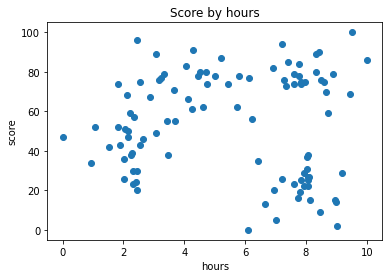

In [33]:
plt.scatter(X[:, 0], X[:, 1]) # x축은 공부 시간, y축은 점수
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

KMeans를 이용해서 이것을 나눠보도록 할 것이다.

고려해야 할 것 : 공부 시간은 0~10인데, score는 0~100까지이다. 즉, scale을 맞춰주어야 한다.

### 데이터 시각화(전체 데이터 분포 확인)

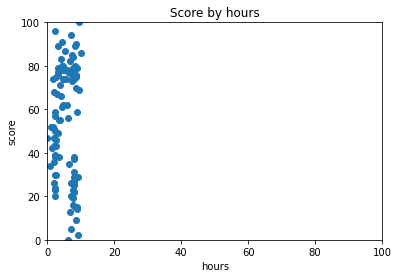

In [34]:
plt.scatter(X[:, 0], X[:, 1]) # x축은 공부 시간, y축은 점수
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

### 피처 스케일링 (Feature Scaling)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

$X$가 scaling되는 것을 볼 수 있다. 0부터 1까지의 범위로 바뀐다.

### 데이터 시각화(스케일링된 데이터)

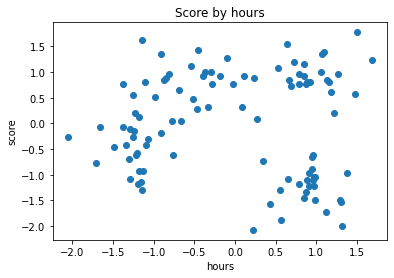

In [37]:
plt.scatter(X[:, 0], X[:, 1]) # x축은 공부 시간, y축은 점수
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 최적의 K 값 찾기 (Elbow Method)

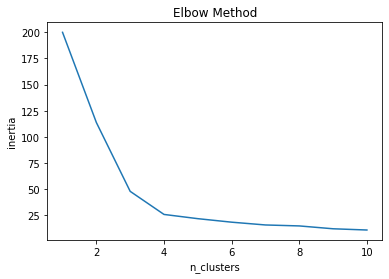

In [38]:
from sklearn.cluster import KMeans
inertia_list = [] # 클러스터에 속한 데이터가 얼마나 가깝게 보이느냐, 각 지점으로부터 중심점까지 거리 제곱합
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    ## 'k-means++'는 개선된 방식으로 centroid 점을 찾는다. 
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심(centroid)까지의 거리제곱합을 append한다.

plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

완만해지는 시점 : 4 정도가 적절하다.

In [40]:
K = 4 # 최적의 K값

    위에서 학습했던 것처럼 n_clusters = 4로 두고 진행.

In [41]:
kmeans = KMeans(n_clusters = K, random_state = 0)
y_kmeans = kmeans.fit_predict(X) # X 데이터를 학습하고, predict한 값을 반응한다.
y_kmeans

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3], dtype=int32)

클러스터가 4개, $[0,1,2,3]$의 클러스터 값이 출력된다.

### 데이터 시각화 (K = 4일 때)

In [44]:
centers = kmeans.cluster_centers_ # 클러스터의 중심점(centroid) 좌표
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

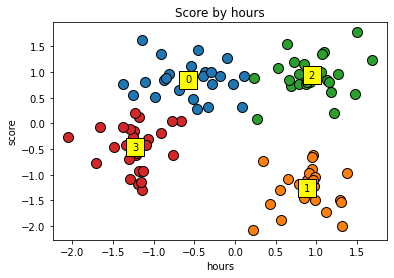

In [47]:
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s =100, edgecolor = 'black')
    # s는 size, edgecolor는 테두리 색
    # 인덱스 뽑아서 클러스터 별로 다르게 색을 도출한다. 따로 색을 지정해주지 않아도 자동으로 클러스터 별로 다른 색이 나온다.
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s = 300, edgecolor = 'black', color = 'yellow', marker ='s') 
    # 클러스터에 대한 중심점 좌표 추가
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va = 'center', ha = 'center')
    # va / ha : 가로 축, 세로 축 조정
    # 클러스터 텍스트 출력을 위한 코드
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

그래프가 만들어졌지만, 스케일링한 데이터 때문에 해석이 쉽지 않다.

### 데이터 시각화 (스케일링 원복)

In [48]:
X_org = sc.inverse_transform(X) # Feature Scaling된 데이터를 다시 원복
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [49]:
centers_org = sc.inverse_transform(centers)
centers_org

array([[ 3.96458333, 76.08333333],
       [ 7.8552    , 20.96      ],
       [ 8.0084    , 78.2       ],
       [ 2.21269231, 41.76923077]])

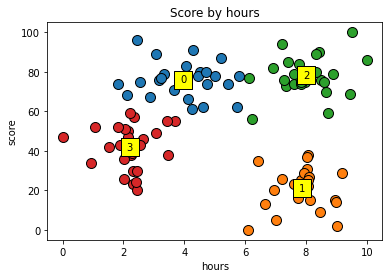

In [51]:
for cluster in range(K):
    plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s =100, edgecolor = 'black')
    # s는 size, edgecolor는 테두리 색
    # 인덱스 뽑아서 클러스터 별로 다르게 색을 도출한다. 따로 색을 지정해주지 않아도 자동으로 클러스터 별로 다른 색이 나온다.
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s = 300, edgecolor = 'black', color = 'yellow', marker ='s') 
    # 클러스터에 대한 중심점 좌표 추가
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va = 'center', ha = 'center')
    # va / ha : 가로 축, 세로 축 조정
    # 클러스터 텍스트 출력을 위한 코드
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()